# Assignment 2: Milestone I Natural Language Processing
## Task 1. Basic Text Pre-processing
#### Student Name: Megha Chandra Shekar
#### Student ID:  3990211

Date: Sunday 1st Oct 2023

Version: 1.0

Environment: Python 3 and Jupyter notebook

## Introduction
You should give a brief information of this assessment task here.

Goal of the assessment : Basic Text Pre-processing

 - To perform basic text pre-processing on the given dataset, including, but not limited to tokenization, removing most/less frequent words and stop words.
 
The focus is on Basic Text Pre-processing.

The assigned folders are : Accounting_Finance,Engineering,Healthcare_Nursing and Sales.

The notebook consists of:

1.Importing libraries

    1.1 Examining and loading data

    1.2 Pre-processing data

2.Saving data


3.Summary

## Importing libraries 

In [1]:
"""
Import the necessary libraries
The os library is used for working with the file system and performing various system-related tasks in Python.
The nltk library is used for Natural Language Processing in Python. NLTK is a powerful library for working with human language data, often used for tasks such as text analysis, natural language processing (NLP), and machine learning with text.
Import the numpy library for performing a wide range of mathematical calculations and efficiently managing arrays and matrices.
Import the pandas library for data manipulation, analysis, and preprocessing. It is associated with the manipulation of tabular data in DataFrames.
Chain is a function provided by the itertools module in Python's standard library. 
A RegexpTokenizer splits a string into substrings using a regular expression.
The load_files function from sklearn is a utility function that allows to load a dataset from a directory structure on filesystem.
The nltk.tokenize.sent_tokenize function is used to tokenize a text into sentences using NLTK (Natural Language Toolkit).
"""
import os
import nltk
import numpy as np
import pandas as pd
from itertools import chain
from nltk import RegexpTokenizer
from sklearn.datasets import load_files 
from nltk.tokenize import sent_tokenize

### 1.1 Examining and loading data
- xamine the data folder, including the categories and job advertisment txt documents, etc. Explain your findings here, e.g., number of folders and format of txt files, etc.
- Load the data into proper data structures and get it ready for processing.
- Extract webIndex and description into proper data structures.


Findings are:
    
- Number of Floders are 4 namely Accounting_Finance,Engineering,Healthcare_Nursing and Sales.


In [2]:
job_data = load_files(r"data")  

In [3]:
job_data['filenames']

array(['data/Accounting_Finance/Job_00382.txt',
       'data/Accounting_Finance/Job_00354.txt',
       'data/Healthcare_Nursing/Job_00547.txt',
       'data/Accounting_Finance/Job_00246.txt',
       'data/Healthcare_Nursing/Job_00543.txt',
       'data/Engineering/Job_00089.txt',
       'data/Healthcare_Nursing/Job_00580.txt',
       'data/Accounting_Finance/Job_00419.txt',
       'data/Sales/Job_00767.txt', 'data/Sales/Job_00670.txt',
       'data/Accounting_Finance/Job_00263.txt',
       'data/Accounting_Finance/Job_00374.txt',
       'data/Engineering/Job_00111.txt', 'data/Sales/Job_00775.txt',
       'data/Engineering/Job_00057.txt', 'data/Sales/Job_00642.txt',
       'data/Sales/Job_00657.txt', 'data/Engineering/Job_00209.txt',
       'data/Sales/Job_00746.txt',
       'data/Healthcare_Nursing/Job_00479.txt',
       'data/Healthcare_Nursing/Job_00491.txt',
       'data/Healthcare_Nursing/Job_00454.txt',
       'data/Sales/Job_00745.txt', 'data/Sales/Job_00649.txt',
       'data/Ac

In [4]:
job_data['target']

array([0, 0, 2, 0, 2, 1, 2, 0, 3, 3, 0, 0, 1, 3, 1, 3, 3, 1, 3, 2, 2, 2,
       3, 3, 0, 2, 2, 2, 0, 2, 3, 1, 2, 0, 1, 3, 3, 1, 1, 0, 2, 2, 2, 2,
       0, 0, 2, 1, 3, 1, 1, 2, 2, 3, 0, 0, 1, 0, 2, 2, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 1, 3, 2, 2, 1, 0, 1, 1, 1,
       3, 0, 3, 1, 3, 2, 2, 0, 2, 3, 2, 1, 0, 1, 1, 2, 0, 3, 0, 1, 3, 2,
       1, 2, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3,
       2, 0, 0, 1, 3, 2, 0, 1, 0, 3, 1, 2, 1, 0, 0, 0, 3, 0, 1, 2, 3, 1,
       1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2, 0, 2, 3, 2, 2, 0, 2,
       1, 0, 1, 1, 1, 3, 1, 3, 1, 0, 3, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1, 3,
       0, 1, 1, 3, 0, 1, 0, 2, 3, 0, 2, 0, 1, 0, 1, 3, 1, 0, 1, 1, 0, 1,
       0, 1, 2, 1, 3, 1, 2, 3, 1, 1, 2, 0, 0, 1, 2, 0, 3, 2, 3, 2, 2, 3,
       0, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 0, 0, 2, 1, 2, 2, 2, 2, 1, 3, 1,
       2, 1, 2, 3, 2, 3, 0, 1, 3, 0, 2, 1, 0, 2, 1, 2, 0, 2, 1, 1, 1, 2,
       2, 1, 2, 0, 2, 2, 1, 2, 0, 1, 0, 0, 3, 2, 1,

In [5]:
job_data['target_names']

['Accounting_Finance', 'Engineering', 'Healthcare_Nursing', 'Sales']

In [6]:
# test whether it matches, just in case
job = 70 # an example, note we will use this example through out this exercise.
job_data['filenames'][job], job_data['target'][job] # from the file path we know that it's the correct class too

('data/Sales/Job_00686.txt', 3)

In [7]:
descriptions, outcome = job_data.data, job_data.target 

In [8]:
descriptions[job]

b'Title: New Business Developer\nWebindex: 72438284\nCompany: A1 People\nDescription: Position: New Business Developer Location: London Salary:****k  Comms Ref:**** Our client based in London is currently looking for a New Business Developer to join the company, now **** strong with over 10 years trading, they are currently in need of a New Business Developer that can start from scratch and bring in new business and new accounts. This is also a chance to build a department and grow with in the organisation. The right person for this role will be a cold caller, lead generator, pitcher , closer and client service manager . Please make sure that your full address and details are included in your application for this role. This job was originally posted as www.totaljobs.com/JobSeeking/NewBusinessDeveloper_job****'

In [9]:
outcome[job]

3

### 1.2 Pre-processing data
Perform the required text pre-processing steps.

In [10]:
from nltk import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from itertools import chain
import numpy as np
import os

def tokenizeReview(raw_review):
    """
    This function first converts all words to lowercase, 
    then segments the raw review into sentences, tokenizes each sentence, 
    and converts the review to a list of tokens.
    """        
    review = raw_review.decode('utf-8')  # Convert the bytes-like object to a Python string, needed before applying any pattern search on it
    nl_review = review.lower()  # Convert all words to lowercase
    
    # Segment into sentences
    sentences = sent_tokenize(nl_review)
    
    # Tokenize each sentence
    pattern = r'''(?x)          # Set flag to allow verbose regexps
        (?:[A-Za-z]\.)+        # Abbreviations, e.g., U.S.A.
        | [A-Za-z]+(?:[-'][A-Za-z]*)?   
         | [a-zA-Z]+(?:[-'][a-zA-Z]+)?# Words with optional internal hyphens and apostrophes
    '''
    tokenizer = RegexpTokenizer(pattern) 
    token_lists = [tokenizer.tokenize(sen) for sen in sentences]
    
    # Merge them into a list of tokens
    tokenised_review = list(chain.from_iterable(token_lists))
    return tokenised_review

def extract_description_from_file(file_path):
    """
    Extract the description text from a file based on specific markers.

    Args:
    - file_path (str): Path to the file containing the description text.

    Returns:
    - str: The extracted description text.
    """
    with open(file_path, 'rb') as f:
        raw_review = f.read()
    
    # Assuming the description starts after the line with "Description:" and ends before the next empty line.
    description_start = raw_review.find(b'Description:') + len(b'Description:')
    description_end = raw_review.find(b'\n\n', description_start)
    description_text = raw_review[description_start:description_end]
    
    return description_text.decode('utf-8')

def tokenize_reviews_in_files(file_dir, categories):
    """
    Tokenize description text data from multiple files in different categories.
    
    Args:
    - file_dir (str): Directory containing the text files.
    - categories (list): List of category names, e.g., ['Accounting_Finance', 'Engineering', 'Healthcare_Nursing', 'Sales'].
    
    Returns:
    - category_tokens (dict): A dictionary where keys are category names and values are lists of tokens for each category's description.
    """
    category_tokens = {}  # Initialize an empty dictionary to store description tokens for each category
    
    for category in categories:
        category_tokens[category] = []  # Initialize an empty list for each category
        
        # Define the directory path for the category
        category_path = os.path.join(file_dir, category)
        
        # List all files in the category directory
        files = os.listdir(category_path)
        
        # Loop through each file, extract its description, and tokenize it
        for file in files:
            file_path = os.path.join(category_path, file)
            description_text = extract_description_from_file(file_path)
            tokens = tokenizeReview(description_text.encode('utf-8'))  # Use the tokenizeReview function
            category_tokens[category].append(tokens)
    
    return category_tokens

# Example usage:
file_dir = 'data'  # Replace with the actual path to your files
categories = ['Accounting_Finance', 'Engineering', 'Healthcare_Nursing', 'Sales']
category_tokens = tokenize_reviews_in_files(file_dir, categories)

for category, tokens_list in category_tokens.items():
    print(f"Category: {category}")
    for i, tokens in enumerate(tokens_list, start=1):
        print(f"  Review {i} Tokens: {tokens}")


Category: Accounting_Finance
  Review 1 Tokens: ['our', 'client', 'is', 'a', 'leading', 'insurer', 'based', 'in', 'belfast', 'as', 'part', 'of', 'their', 'continued', 'expansion', 'an', 'opportunity', 'has', 'arisen', 'for', 'an', 'enthusiastic', 'experienced', 'individual', 'to', 'join', 'the', 'commercial', 'underwriting', 'team', 'in', 'belfast', 'job', 'specification', 'liaise', 'with', 'the', 'broker', 'network', 'in', 'relation', 'to', 'quotations', 'for', 'liability', 'property', 'commercial', 'combined', 'risks', 'complying', 'with', 'all', 'regulatory', 'and', 'internal', 'systems', 'controls', 'proactively', 'resolving', 'enquiries', 'from', 'the', 'agency', 'network', 'and', 'operations', 'team', 'providing', 'expert', 'technical', 'advice', 'and', 'guidance', 'to', 'customers', 'analysing', 'underwriting', 'and', 'processing', 'individual', 'risks', 'including', 'more', 'complex', 'risks', 'providing', 'coaching', 'and', 'guidance', 'to', 'other', 'members', 'of', 'the', 't

In [11]:
import numpy as np
from itertools import chain

def stats_print(category_tokens):
    total_words = []
    total_reviews = []
    total_lengths = []

    for category, tokens in category_tokens.items():
        words = list(chain.from_iterable(tokens))
        vocab = set(words)
        lexical_diversity = len(vocab) / len(words)
        review_lengths = [len(review) for review in tokens]
        total_words.extend(words)
        total_reviews.extend(tokens)
        total_lengths.extend(review_lengths)

        print(f"Category: {category}")
        print("Vocabulary size: ", len(vocab))
        print("Total number of tokens: ", len(words))
        print("Lexical diversity: ", lexical_diversity)
        print("Total number of reviews:", len(tokens))
        print("Average review length:", np.mean(review_lengths))
        print("Maximum review length:", np.max(review_lengths))
        print("Minimum review length:", np.min(review_lengths))
        print("Standard deviation of review length:", np.std(review_lengths))
        print("\n")

    print("Overall Statistics for All Categories")
    overall_vocab = set(total_words)
    overall_lexical_diversity = len(overall_vocab) / len(total_words)
    print("Overall Vocabulary size: ", len(overall_vocab))
    print("Overall Total number of tokens: ", len(total_words))
    print("Overall Lexical diversity: ", overall_lexical_diversity)
    print("Overall Total number of reviews:", len(total_reviews))
    print("Overall Average review length:", np.mean(total_lengths))
    print("Overall Maximum review length:", np.max(total_lengths))
    print("Overall Minimum review length:", np.min(total_lengths))
    print("Overall Standard deviation of review length:", np.std(total_lengths))

stats_print(category_tokens)


Category: Accounting_Finance
Vocabulary size:  4210
Total number of tokens:  43817
Lexical diversity:  0.09608142958212566
Total number of reviews: 191
Average review length: 229.40837696335078
Maximum review length: 710
Minimum review length: 41
Standard deviation of review length: 111.72006308300901


Category: Engineering
Vocabulary size:  5355
Total number of tokens:  55565
Lexical diversity:  0.09637361648519752
Total number of reviews: 231
Average review length: 240.54112554112555
Maximum review length: 786
Minimum review length: 27
Standard deviation of review length: 127.53109050196585


Category: Healthcare_Nursing
Vocabulary size:  4427
Total number of tokens:  45369
Lexical diversity:  0.09757764112058895
Total number of reviews: 198
Average review length: 229.13636363636363
Maximum review length: 815
Minimum review length: 25
Standard deviation of review length: 134.0761753590028


Category: Sales
Vocabulary size:  4308
Total number of tokens:  42125
Lexical diversity:  0.1

In [12]:
from itertools import chain

removed_words = []

for category, reviews in category_tokens.items():
    st_list = [[w for w in review if len(w) < 2] for review in reviews]
    removed = list(chain.from_iterable(st_list))
    removed_words.extend(removed)

    # Filter out short words from the reviews
    category_tokens[category] = [[word for word in review if len(word) >= 2] for review in reviews]

# Print the removed words
print("\nRemoved Words:", removed_words)



Removed Words: ['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 's', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 's', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'p', 'a', 'a', 'a', 'a', 'p', 'a', 'a', 'a', 'a', 's', 'a', 'a', 'a', 'i', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'm', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 't', 'c', 's', 'u', 'a', 's', 'a', 'a', 'a', 'a', 'a', 'e', 'a', 'a', 'a', 'a', 's', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 's', 'k', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 's', 'c', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'k', 'a', 'a', 'a', 'a'

In [13]:
category_tokens[category]

[['senior',
  'sales',
  'negotiator',
  'location',
  'shoreditch',
  'salary',
  'depending',
  'on',
  'experience',
  'ote',
  'car',
  'allowance',
  'company',
  'bridge',
  'shoreditch',
  'job',
  'type',
  'permanent',
  'brilliant',
  'proven',
  'opportunity',
  'for',
  'confident',
  'and',
  'experienced',
  'sales',
  'negotiator',
  'senior',
  'sales',
  'negotiator',
  'to',
  'join',
  'well',
  'established',
  'independent',
  'estate',
  'agent',
  'with',
  'an',
  'excellent',
  'reputation',
  'and',
  'great',
  'office',
  'atmosphere',
  'as',
  'senior',
  'sales',
  'negotiator',
  'your',
  'role',
  'will',
  'involve',
  'generating',
  'leads',
  'following',
  'these',
  'up',
  'and',
  'consistently',
  'aiming',
  'for',
  'high',
  'conversion',
  'rates',
  'working',
  'closely',
  'with',
  'the',
  'team',
  'to',
  'identify',
  'new',
  'business',
  'opportunities',
  'and',
  'generate',
  'new',
  'ideas',
  'ensuring',
  'that',
  'all',

In [14]:
 #Define a function to load stopwords from a file
def load_stopwords(stopwords_file):
    with open(stopwords_file, 'r') as file:
        stopwords_set = set(file.read().splitlines())
    return stopwords_set

# Load stopwords from stopwords_en.txt
stopwords_file = 'stopwords_en.txt'
stopwords_en = load_stopwords(stopwords_file)

# Define a function to remove stopwords from a list of tokens
def remove_stopwords(tokens, stopwords):
    removed_words = [token for token in tokens if token.lower() in stopwords]
    cleaned_tokens = [token for token in tokens if token.lower() not in stopwords]
    return cleaned_tokens, removed_words

# Define a function to process a category's reviews
def process_category(tokens, stopwords):
    category_reviews = []

    for review_tokens in tokens:
        # Remove stopwords from the tokens and get removed words
        cleaned_tokens, removed_words = remove_stopwords(review_tokens, stopwords)
        category_reviews.append(cleaned_tokens)
            
        # Print removed words for each review
        print(f"Removed Words: {', '.join(removed_words)}")

    return category_reviews

# Process each category in the category_tokens dictionary
for category, tokens in category_tokens.items():
    print(f"Category: {category}")
    cleaned_reviews = process_category(tokens, stopwords_en)
    # Now, 'cleaned_reviews' contains the tokenized and stopwords-removed reviews for this category


Category: Accounting_Finance
Removed Words: our, is, in, as, of, their, an, has, for, an, to, the, in, with, the, in, to, for, with, all, and, from, the, and, and, to, and, more, and, to, other, of, the, of, and, with, the, and, when, the, will, be, to, appropriate, within, to, and, the, to, and, to, and, upon, and, to, the, of, can, do, the, to, and, of, of, will, be, in, the, of, and, will, to, be, please, in, via, the, we, are, of, the, need, for, when, this, of, therefore, your, will, not, be, to, any, until, you, have, been, of, the, and, have, us, to, to, our, of, or, to, for, via, please, our, at, com, as, of, the, and, as, both, an, and, we, to, all, and, regardless, of, or
Removed Words: as, at, in, you, be, for, and, to, and, on, of, with, and, on, brief, and, on, other, under, for, and, by, to, the, of, the, which, and, to, and, in, on, by, of, or, should, be, with, should, have, should, have, to, and, is, given, in, the, and, of, the, to, and, across, and, to, and, to, in, 

In [15]:
cleaned_reviews

[['senior',
  'sales',
  'negotiator',
  'location',
  'shoreditch',
  'salary',
  'depending',
  'experience',
  'ote',
  'car',
  'allowance',
  'company',
  'bridge',
  'shoreditch',
  'job',
  'type',
  'permanent',
  'brilliant',
  'proven',
  'opportunity',
  'confident',
  'experienced',
  'sales',
  'negotiator',
  'senior',
  'sales',
  'negotiator',
  'join',
  'established',
  'independent',
  'estate',
  'agent',
  'excellent',
  'reputation',
  'great',
  'office',
  'atmosphere',
  'senior',
  'sales',
  'negotiator',
  'role',
  'involve',
  'generating',
  'leads',
  'consistently',
  'aiming',
  'high',
  'conversion',
  'rates',
  'working',
  'closely',
  'team',
  'identify',
  'business',
  'opportunities',
  'generate',
  'ideas',
  'ensuring',
  'customers',
  'receive',
  'professional',
  'efficient',
  'friendly',
  'personalised',
  'service',
  'ensuring',
  'financial',
  'targets',
  'met',
  'exceeded',
  'monthly',
  'basis',
  'consistently',
  'demonst

In [16]:
from nltk.probability import *
words = list(chain.from_iterable(cleaned_reviews)) # we put all the tokens in the corpus in a single list
term_fd = FreqDist(words) 
lessFreqWords = set(term_fd.hapaxes())
print(lessFreqWords)

{'extraordinary', 'reasons', 'diplomacy', 'knocking', 'transportations', 'rehabilitation', 'engaged', 'wardrobes', 'drawings', 'swiftly', 'mainland', 'backed', 'promenade', 'evolution', 'persistence', 'officebased', "development'", 'remainder', 'prescribed', 'defence', 'renewal', 'jobstoday', 'kennedy', 'recently', 'comparable', 'exposed', 'coordinators', 'teamworking', 'ford', 'andaccount', 'subscriptions', 'germanspeakingtelemarketer', 'provision', 'partssalesexecutive', 'staffs', 'surveillance', 'costings', 'weddings', 'bottom', 'preeminent', 'explored', 'juniorsalesassistantimmediatestart', 'mcafee', 'introductory', "outstanding'", "right'", 'sole', 'channels', 'patch', 'collaborate', 'applytodaystarttomorrownewsalesfor', 'physiotherapy', 'salesyou', 'improved', 'promises', 'strive', 'grips', 'pubs', 'deem', 'mainstay', 'fairly', 'bundles', 'promptly', 'strengthen', 'sundays', 'initiating', 'articulately', 'vehicl', 'branding', 'competent', 'lap', 'chains', 'sight', 'vitally', 'inv

In [17]:
len(lessFreqWords)

1914

In [18]:
# Remove words that appear only once from cleaned_reviews
cleaned_reviews = [[word for word in review if word not in lessFreqWords] for review in cleaned_reviews]

In [19]:
# Print the words that were removed (lessFreqWords)
print("Words that appear only once (hapaxes):")
print(lessFreqWords)

# Now, check the cleaned_reviews to see if the words have been removed
for i, review in enumerate(cleaned_reviews):
    print(f"Review {i + 1} after removing lessFreqWords:")
    print(review)


Words that appear only once (hapaxes):
{'extraordinary', 'reasons', 'diplomacy', 'knocking', 'transportations', 'rehabilitation', 'engaged', 'wardrobes', 'drawings', 'swiftly', 'mainland', 'backed', 'promenade', 'evolution', 'persistence', 'officebased', "development'", 'remainder', 'prescribed', 'defence', 'renewal', 'jobstoday', 'kennedy', 'recently', 'comparable', 'exposed', 'coordinators', 'teamworking', 'ford', 'andaccount', 'subscriptions', 'germanspeakingtelemarketer', 'provision', 'partssalesexecutive', 'staffs', 'surveillance', 'costings', 'weddings', 'bottom', 'preeminent', 'explored', 'juniorsalesassistantimmediatestart', 'mcafee', 'introductory', "outstanding'", "right'", 'sole', 'channels', 'patch', 'collaborate', 'applytodaystarttomorrownewsalesfor', 'physiotherapy', 'salesyou', 'improved', 'promises', 'strive', 'grips', 'pubs', 'deem', 'mainstay', 'fairly', 'bundles', 'promptly', 'strengthen', 'sundays', 'initiating', 'articulately', 'vehicl', 'branding', 'competent', 'l

In [20]:
words_2 = list(chain.from_iterable([set(review) for review in cleaned_reviews]))
doc_fd = FreqDist(words_2)  # compute document frequency for each unique word/type
doc_fd.most_common(50)

[('sales', 138),
 ('role', 114),
 ('experience', 113),
 ('business', 106),
 ('job', 103),
 ('company', 98),
 ('team', 89),
 ('uk', 85),
 ('client', 83),
 ('www', 79),
 ('work', 79),
 ('originally', 77),
 ('posted', 77),
 ('jobseeking', 77),
 ('skills', 76),
 ('manager', 75),
 ('salary', 73),
 ('excellent', 71),
 ('based', 70),
 ('opportunity', 68),
 ('working', 68),
 ('clients', 68),
 ('successful', 63),
 ('basic', 61),
 ('management', 61),
 ('market', 60),
 ('training', 59),
 ('customer', 58),
 ('development', 57),
 ('leading', 57),
 ('apply', 56),
 ('join', 55),
 ('executive', 55),
 ('strong', 55),
 ('candidate', 55),
 ('recruitment', 54),
 ('service', 53),
 ('account', 53),
 ('career', 53),
 ('car', 52),
 ('ote', 51),
 ('opportunities', 51),
 ('totaljobs', 51),
 ('selling', 51),
 ('benefits', 51),
 ('ability', 49),
 ('required', 48),
 ('products', 48),
 ('full', 47),
 ('contact', 47)]

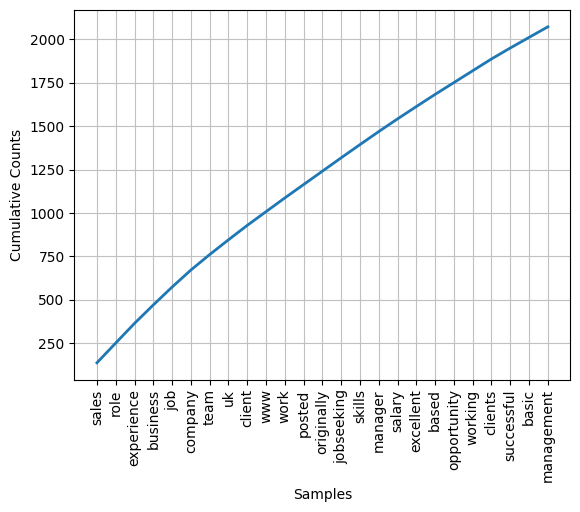

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [21]:
doc_fd.plot(25, cumulative=True)

In [22]:
from nltk.util import ngrams
bigrams = ngrams(words, n = 2)
fdbigram = FreqDist(bigrams)

In [23]:
fdbigram.most_common()

[(('sales', 'executive'), 88),
 (('job', 'originally'), 77),
 (('originally', 'posted'), 77),
 (('posted', 'www'), 74),
 (('business', 'development'), 73),
 (('sales', 'manager'), 64),
 (('www', 'totaljobs'), 51),
 (('totaljobs', 'jobseeking'), 51),
 (('field', 'sales'), 49),
 (('sales', 'experience'), 44),
 (('track', 'record'), 39),
 (('basic', 'salary'), 37),
 (('face', 'face'), 31),
 (('development', 'manager'), 31),
 (('customer', 'service'), 30),
 (('sales', 'team'), 30),
 (('account', 'manager'), 30),
 (('communication', 'skills'), 29),
 (('graduate', 'sales'), 27),
 (('excellent', 'communication'), 26),
 (('uk', 'jobseeking'), 26),
 (('send', 'cv'), 26),
 (('uncapped', 'commission'), 26),
 (('account', 'management'), 26),
 (('www', 'salestarget'), 23),
 (('salestarget', 'uk'), 23),
 (('ideal', 'candidate'), 22),
 (('company', 'car'), 22),
 (('sales', 'recruitment'), 21),
 (('employment', 'agency'), 20),
 (('proven', 'track'), 20),
 (('sales', 'executives'), 20),
 (('sales', 'ro

In [24]:
rep_patterns = ['sales executive','development manager','business development','sales manager','basic salary','customer service','sales team','account manager','communication skills']
replacements = ['sales_executive','development_manager','business_development','sales_manager','basic_salary','customer_service','sales_team','account_manager','communication_skills']

In [25]:
import re
cleaned_reviews = [" ".join(review) for review in cleaned_reviews] # construct the article string

for i in range(0, len(cleaned_reviews)): 
    for j in  range(0,len(rep_patterns)):
        cleaned_reviews[i] = re.sub(rep_patterns[j], replacements[j], cleaned_reviews[i]) # replace with bigram representation 

cleaned_reviews = [review.split(" ") for review in cleaned_reviews] # convert back to tokenised article


In [26]:
words = list(chain.from_iterable([set(review) for  review  in cleaned_reviews]))
vocab = set(words)

In [27]:
'sales_executive' in vocab

True

## Saving required outputs
Save the vocabulary, bigrams and job advertisment txt as per spectification.
- vocab.txt

In [28]:
# Convert the list of unique words into a list and sort it alphabetically
cleaned_reviews = sorted(list(set(words)))

# Create a dictionary that maps each word to its index
word_to_index = {word: index for index, word in enumerate(cleaned_reviews)}

# Define the path to save the vocab.txt file
vocab_file_path = 'vocab.txt'

# Open the file in write mode and write the vocabulary in the required format
with open(vocab_file_path, 'w') as vocab_file:
    for index, word in enumerate(cleaned_reviews):
        vocab_file.write(f"{word}:{index}\n")

print(f"Vocabulary file saved at: {vocab_file_path}")

Vocabulary file saved at: vocab.txt


## Summary
Give a short summary and anything you would like to talk about the assessment task here.

## Couple of notes for all code blocks in this notebook
- please provide proper comment on your code
- Please re-start and run all cells to make sure codes are runable and include your output in the submission.   
<span style="color: red"> This markdown block can be removed once the task is completed. </span>